In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
csv_file_path='/content/drive/MyDrive/AI in Healthcare/Ratina_data/train.csv'
df=pd.read_csv(csv_file_path)

diagnosis_dict_binary={
    0:'No_DR',
    1:'DR',
    2:'DR',
    3:'DR',
    4:'DR'
}

diagnosis_dict={
    0:'No_DR',
    1:'Mild',
    2:'Moderate',
    3:'Severe',
    4:'Proliferate_DR'
}


df['binary_type']=df['diagnosis'].map(diagnosis_dict_binary)
df['type']=df['diagnosis'].map(diagnosis_dict.get)
df.head()

,id_code,diagnosis,binary_type,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: ylabel='type'>

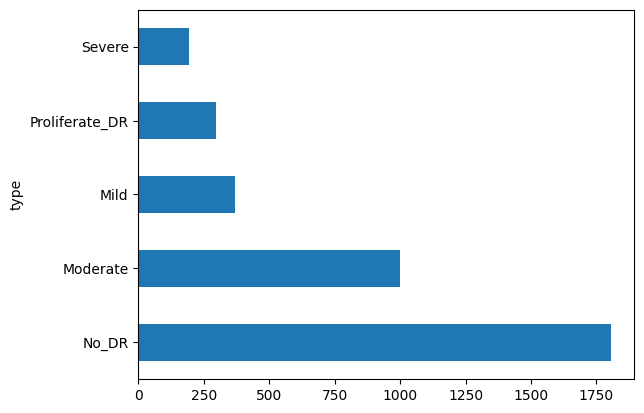

In [3]:
df['type'].value_counts().plot(kind='barh')


<Axes: ylabel='binary_type'>

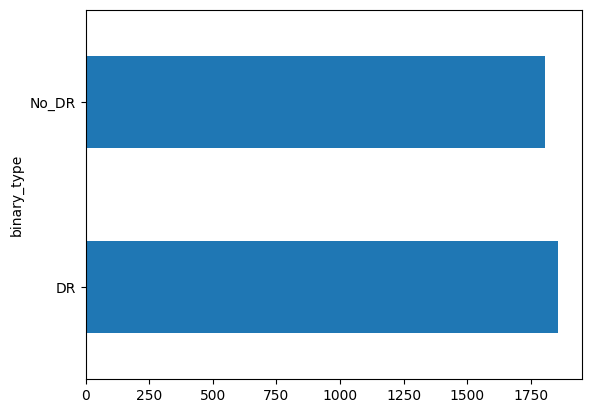

In [4]:
df['binary_type'].value_counts().plot(kind='barh')

In [10]:
from sklearn.model_selection import train_test_split

train_intermediate,test_intermediate=train_test_split(df, test_size=0.15, stratify=df['type'])

train,val=train_test_split(train_intermediate, test_size=0.15/ (1-0.15), stratify=train_intermediate['type'])


print(train['type'].value_counts(),'\n')
print(test['type'].value_counts(), '\n')
print(val['type'].value_counts(), '\n')


type
No_DR             1263
Moderate           699
Mild               258
Proliferate_DR     207
Severe             135
Name: count, dtype: int64 

type
No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: count, dtype: int64 

type
No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: count, dtype: int64 



In [13]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir='/content/drive/MyDrive/AI in Healthcare/Ratina_data'

train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir, 'val')
test_dir=os.path.join(base_dir, 'test')

#Corrected the class name from ImageDatagenerator to ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

test_generator=val_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 10 images belonging to 2 classes.
Found 3 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [17]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=30
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7000 - loss: 0.6902 - val_accuracy: 0.6667 - val_loss: 0.6633
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4000 - loss: 0.8451 - val_accuracy: 0.3333 - val_loss: 1.1140
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6000 - loss: 0.8043 - val_accuracy: 0.3333 - val_loss: 0.7488
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7000 - loss: 0.6777 - val_accuracy: 0.6667 - val_loss: 0.7067
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4000 - loss: 0.6919 - val_accuracy: 0.6667 - val_loss: 0.7297
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6000 - loss: 0.6686 - val_accuracy: 0.0000e+00 - val_loss: 0.7629
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7000 - loss: 0.6563 - val_accuracy: 0.0000e+00 - val_loss: 0.7794
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.6460 - val_accuracy: 0.3333 - val_loss: 0.8184
Epoch 9/30
1/1 ━━━━

In [20]:
test_loss, test_accuracy=model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - accuracy: 0.5000 - loss: 2.0960
Test Accuracy: 50.00%


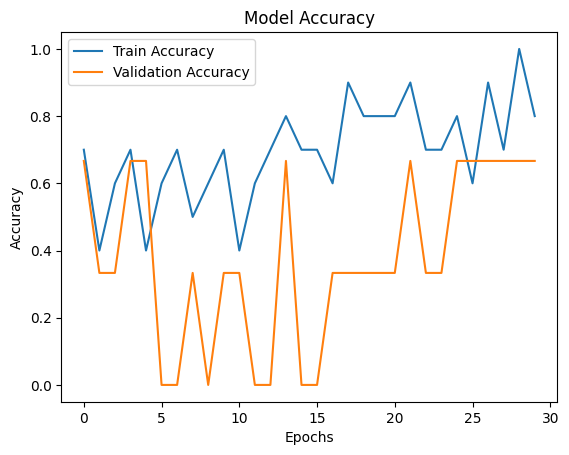

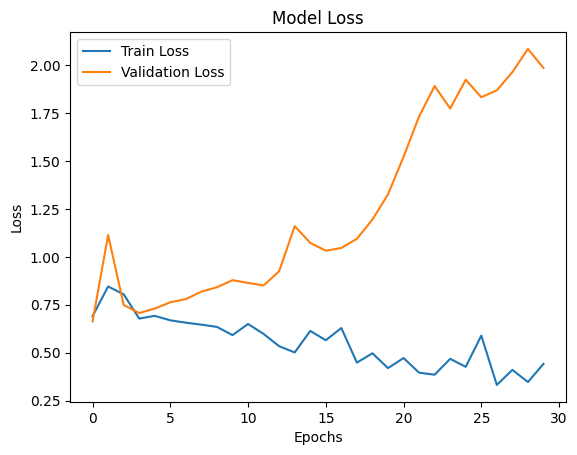

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
from tensorflow.keras.preprocessing import image

def load_and_preprocess_data(img_path):
  img=image.load_img(img_path, target_size=(224,224))
  img_array=image.img_to_array(img)
  img_array=np.expand_dims(img_array, axis=0)
  img_array=img_array/255.0
  return img_array


def predict_diabetic_retinopathy(img_array,model):
  img_array=load_and_preprocess_data(img_path)
  prediction=model.predict(img_array)

  if prediction[0]>0.5:
    print("The image shows signs of Diabetic Retinopathy")

  else:
    print("The image does not show signs of Diabetic Retinopathy")

  return prediction

img_path='/content/drive/MyDrive/AI in Healthcare/Ratina_data/test/dr/003f0afdcd15.png'
prediction=predict_diabetic_retinopathy(img_path,model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
The image does not show signs of Diabetic Retinopathy
